<a href="https://colab.research.google.com/github/manifoldailearning/Youtube/blob/master/Time_Series_Forecasting_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Watch on Youtube : https://youtu.be/DpOwWuRoWro

# Time Series Forecasting

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install fbprophet

In [ ]:
import fbprophet

In [ ]:
fbprophet.__version__

'0.6'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/manifoldailearning/Youtube/master/BikeSales.csv")
df.head()

,Month,Sales
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


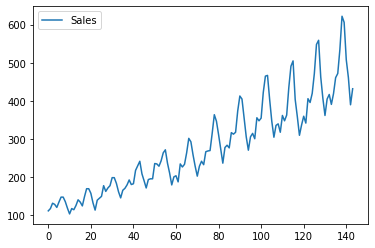

In [ ]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

Column Names should be : ds & y

column : ds --> data type : Date Time

In [ ]:
df.columns = ["ds","y"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df["ds"] = pd.to_datetime(df["ds"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = list()
for i in range(1, 13):
	date = '1960-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [ ]:
future

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
5,1960-06-01
6,1960-07-01
7,1960-08-01
8,1960-09-01
9,1960-10-01


In [ ]:
forecast = model.predict(future)
forecast
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,450.783289,397.744845,453.420345,450.783289,450.783289,-24.555949,-24.555949,-24.555949,-24.555949,-24.555949,-24.555949,0.0,0.0,0.0,426.227340
1,1960-02-01,453.905909,388.551878,447.346137,453.905909,453.905909,-34.666964,-34.666964,-34.666964,-34.666964,-34.666964,-34.666964,0.0,0.0,0.0,419.238944
2,1960-03-01,456.827069,428.206342,483.531132,456.827069,456.827069,-1.947180,-1.947180,-1.947180,-1.947180,-1.947180,-1.947180,0.0,0.0,0.0,454.879889
3,1960-04-01,459.949689,426.870420,485.527551,459.949689,459.949689,-3.997130,-3.997130,-3.997130,-3.997130,-3.997130,-3.997130,0.0,0.0,0.0,455.952559
4,1960-05-01,462.971580,428.958911,485.048512,462.971580,462.971580,-4.409083,-4.409083,-4.409083,-4.409083,-4.409083,-4.409083,0.0,0.0,0.0,458.562496
5,1960-06-01,466.094200,472.088947,529.760710,466.094200,466.094200,35.095889,35.095889,35.095889,35.095889,35.095889,35.095889,0.0,0.0,0.0,501.190089
6,1960-07-01,469.116090,509.135019,568.729335,469.116090,469.116090,70.625621,70.625621,70.625621,70.625621,70.625621,70.625621,0.0,0.0,0.0,539.741712
7,1960-08-01,472.238710,512.793624,568.063679,472.238710,472.238710,68.381499,68.381499,68.381499,68.381499,68.381499,68.381499,0.0,0.0,0.0,540.620209
8,1960-09-01,475.361330,464.093171,522.346324,475.361330,475.361330,16.107699,16.107699,16.107699,16.107699,16.107699,16.107699,0.0,0.0,0.0,491.469029
9,1960-10-01,478.383221,429.209409,486.122083,478.383221,478.383221,-21.559742,-21.559742,-21.559742,-21.559742,-21.559742,-21.559742,0.0,0.0,0.0,456.823479


,ds,yhat,yhat_lower,yhat_upper
0,1960-01-01,426.227340,397.744845,453.420345
1,1960-02-01,419.238944,388.551878,447.346137
2,1960-03-01,454.879889,428.206342,483.531132
3,1960-04-01,455.952559,426.870420,485.527551
4,1960-05-01,458.562496,428.958911,485.048512
5,1960-06-01,501.190089,472.088947,529.760710
6,1960-07-01,539.741712,509.135019,568.729335
7,1960-08-01,540.620209,512.793624,568.063679
8,1960-09-01,491.469029,464.093171,522.346324
9,1960-10-01,456.823479,429.209409,486.122083


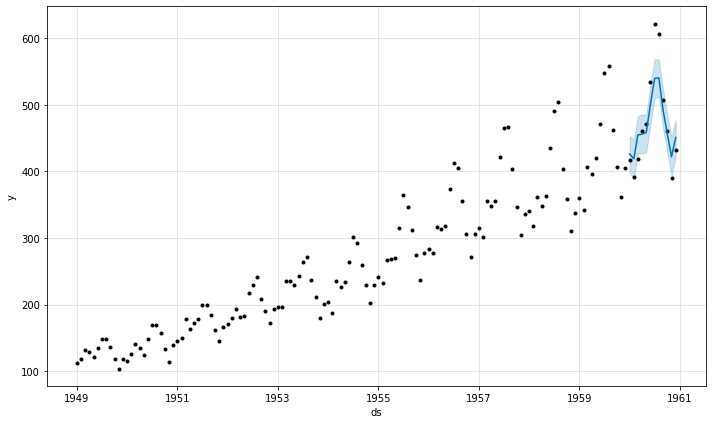

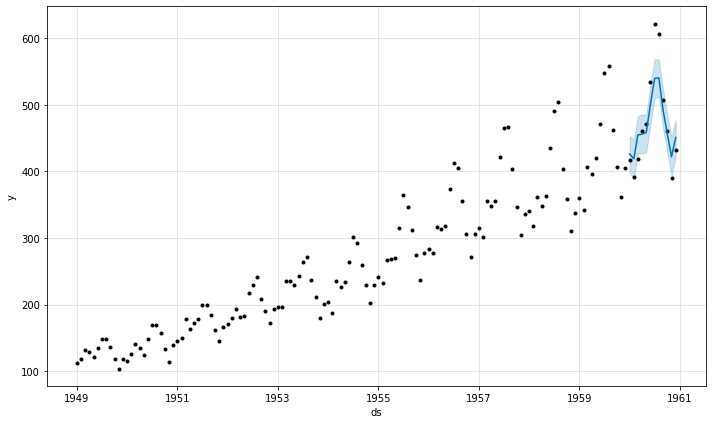

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
future = list()
for i in range(1, 13):
	date = '1961-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [ ]:
future

,ds
0,1961-01-01
1,1961-02-01
2,1961-03-01
3,1961-04-01
4,1961-05-01
5,1961-06-01
6,1961-07-01
7,1961-08-01
8,1961-09-01
9,1961-10-01


In [ ]:
forecast = model.predict(future)
forecast
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,487.650351,435.014087,491.891838,487.650351,487.650351,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,0.0,0.0,0.0,466.171772
1,1961-02-01,490.772971,432.394540,489.076243,490.765036,490.790475,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,0.0,0.0,0.0,460.648849
2,1961-03-01,493.593402,464.772589,520.353632,493.563776,493.636534,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,0.0,0.0,0.0,493.186305
3,1961-04-01,496.716022,462.638012,521.082527,496.649662,496.791455,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,0.0,0.0,0.0,491.787575
4,1961-05-01,499.737913,466.822167,524.479415,499.627039,499.846591,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,0.0,0.0,0.0,496.106650
5,1961-06-01,502.860533,510.120959,563.898869,502.693458,503.019169,34.290117,34.290117,34.290117,34.290117,34.290117,34.290117,0.0,0.0,0.0,537.150650
6,1961-07-01,505.882423,546.286920,607.009761,505.660846,506.090633,70.825717,70.825717,70.825717,70.825717,70.825717,70.825717,0.0,0.0,0.0,576.708140
7,1961-08-01,509.005043,547.829025,606.685708,508.715526,509.274900,68.105794,68.105794,68.105794,68.105794,68.105794,68.105794,0.0,0.0,0.0,577.110838
8,1961-09-01,512.127663,500.536728,557.271014,511.772119,512.461700,16.430358,16.430358,16.430358,16.430358,16.430358,16.430358,0.0,0.0,0.0,528.558021
9,1961-10-01,515.149554,465.677863,522.002126,514.723466,515.544573,-21.761569,-21.761569,-21.761569,-21.761569,-21.761569,-21.761569,0.0,0.0,0.0,493.387985


,ds,yhat,yhat_lower,yhat_upper
0,1961-01-01,466.171772,435.014087,491.891838
1,1961-02-01,460.648849,432.394540,489.076243
2,1961-03-01,493.186305,464.772589,520.353632
3,1961-04-01,491.787575,462.638012,521.082527
4,1961-05-01,496.106650,466.822167,524.479415
5,1961-06-01,537.150650,510.120959,563.898869
6,1961-07-01,576.708140,546.286920,607.009761
7,1961-08-01,577.110838,547.829025,606.685708
8,1961-09-01,528.558021,500.536728,557.271014
9,1961-10-01,493.387985,465.677863,522.002126


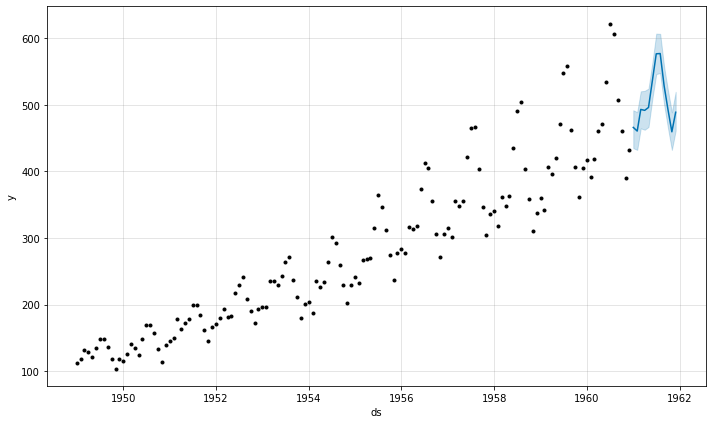

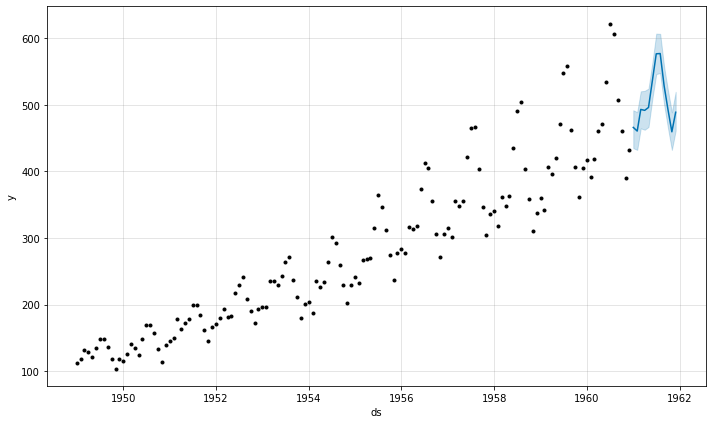

In [ ]:
model.plot(forecast)
plt.show()

# Evaluation of Model

In [ ]:
#Split into training & test data
train = df.drop(df.index[-12:])
train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
127,1959-08-01,559
128,1959-09-01,463
129,1959-10-01,407
130,1959-11-01,362


In [ ]:
model = Prophet()
model.fit(train)
future = list()
for i in range(1, 13):
	date = '1960-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)
y_true = df["y"][-12:].values

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
loss = mean_absolute_error(y_true,forecast["yhat"])

In [ ]:
loss

33.44531200973683

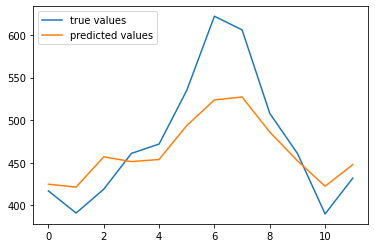

In [ ]:
plt.plot(y_true,label="true values")
plt.plot(forecast["yhat"],label = "predicted values")
plt.legend()
plt.show()